# 데이터프레임 변경 (1)

1) pandas 라이브러리를 불러오세요.

In [25]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'

2) 다음 경로의 파일을 읽어 titanic 데이터프레임을 만드세요.

- 파일 경로: 'https://raw.githubusercontent.com/Jangrae/csv/master/titanic.csv'

**[titanic 데이터 셋 정보]**

- Survived: 생존여부(1=Yes, 0=No)
- Pclass: 객실등급(1=1st, 2=2nd, 3=3rd)
- Sex: 성별(male, female)
- Age: 나이
- Sibsp: 탑승한 형제자매, 배우자 수
- Parch: 탑승한 자녀, 부모 수 parents and child
- Ticket: 티켓 번호
- Fare: 요금
- Cabin: 캐빈 번호
- Embarked: 출발한 항구((C=Cherbourg, Q=Queenstown, S=Southampton)

In [26]:
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/titanic.csv'

titanic = pd.read_csv(path)


3) 상위 5개 행을 확인하세요.

In [27]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


4) 다음 요구사항에 맞게 순서대로 구문을 작성하고 확인하세요.

- 4-1) PassengerId, Name, Ticket, Cabin 열을 한 번에 삭제하세요.
- 4-2) Sex 열 이름을 Male로 변경하세요.
- 4-3) Male 열 값을 'male'은 1, 'female'은 0으로 변경하세요.
- 4-4) SibSp 열과 Parch 열의 값을 더한 결과를 갖는 Family 열을 추가하세요.
- 4-5) SibSp, Parch 두 열을 삭제하세요.
- 4-6) 결과를 확인하세요.

In [28]:
#4-1
del_cols = ['PassengerId','Name','Ticket','Cabin']

titanic.drop(labels = del_cols, axis = 1, inplace = True)

titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [29]:
#4-2
titanic.rename(columns = {'Sex':'Male'}, inplace = True)
titanic

,Survived,Pclass,Male,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [30]:
#4-3) Male 열 값을 'male'은 1, 'female'은 0으로 변경하세요.

titanic['Male'] = titanic['Male'].map({'male':1, 'female': 0 })
titanic

,Survived,Pclass,Male,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,S
887,1,1,0,19.0,0,0,30.0000,S
888,0,3,0,NaN,1,2,23.4500,S
889,1,1,1,26.0,0,0,30.0000,C


In [31]:
#4-4) SibSp 열과 Parch 열의 값을 더한 결과를 갖는 Family 열을 추가하세요.
titanic['Family'] = titanic['SibSp'] + titanic['Parch']
titanic

,Survived,Pclass,Male,Age,SibSp,Parch,Fare,Embarked,Family
0,0,3,1,22.0,1,0,7.2500,S,1
1,1,1,0,38.0,1,0,71.2833,C,1
2,1,3,0,26.0,0,0,7.9250,S,0
3,1,1,0,35.0,1,0,53.1000,S,1
4,0,3,1,35.0,0,0,8.0500,S,0
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,S,0
887,1,1,0,19.0,0,0,30.0000,S,0
888,0,3,0,NaN,1,2,23.4500,S,3
889,1,1,1,26.0,0,0,30.0000,C,0


In [32]:
#4-5) SibSp, Parch 두 열을 삭제하세요.
titanic.drop(['SibSp','Parch'],axis = 1,inplace =True)
titanic

,Survived,Pclass,Male,Age,Fare,Embarked,Family
0,0,3,1,22.0,7.2500,S,1
1,1,1,0,38.0,71.2833,C,1
2,1,3,0,26.0,7.9250,S,0
3,1,1,0,35.0,53.1000,S,1
4,0,3,1,35.0,8.0500,S,0
...,...,...,...,...,...,...,...
886,0,2,1,27.0,13.0000,S,0
887,1,1,0,19.0,30.0000,S,0
888,0,3,0,NaN,23.4500,S,3
889,1,1,1,26.0,30.0000,C,0


In [ ]:
# 4-1 열 삭제
titanic.drop(labels = ['PassengerId','Name','Ticket','Cabin'], axis = 1, inplace =True)



In [45]:
# 4-2 열 이름 변경
# cols = list(titanic.columns)
# new_cols = ['Survived', 'Pclass', 'Male', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
# titanic.columns = new_cols
titanic.rename(columns = {'Sex': 'Male'}, inplace = True)


In [46]:
# 4-3 element 변경
titanic['Male'] = titanic['Male'].map({'male' : 1, 'female': 0 })

titanic

,Survived,Pclass,Male,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,S
887,1,1,0,19.0,0,0,30.0000,S
888,0,3,0,NaN,1,2,23.4500,S
889,1,1,1,26.0,0,0,30.0000,C


In [48]:
# 4-4 family 열 추가
titanic['family'] = titanic['SibSp'] + titanic['Parch']
titanic

,Survived,Pclass,Male,Age,SibSp,Parch,Fare,Embarked,family
0,0,3,1,22.0,1,0,7.2500,S,1
1,1,1,0,38.0,1,0,71.2833,C,1
2,1,3,0,26.0,0,0,7.9250,S,0
3,1,1,0,35.0,1,0,53.1000,S,1
4,0,3,1,35.0,0,0,8.0500,S,0
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,S,0
887,1,1,0,19.0,0,0,30.0000,S,0
888,0,3,0,NaN,1,2,23.4500,S,3
889,1,1,1,26.0,0,0,30.0000,C,0


In [49]:
titanic.drop(labels = ['SibSp','Parch'], axis = 1, inplace =True)
titanic



,Survived,Pclass,Male,Age,Fare,Embarked,family
0,0,3,1,22.0,7.2500,S,1
1,1,1,0,38.0,71.2833,C,1
2,1,3,0,26.0,7.9250,S,0
3,1,1,0,35.0,53.1000,S,1
4,0,3,1,35.0,8.0500,S,0
...,...,...,...,...,...,...,...
886,0,2,1,27.0,13.0000,S,0
887,1,1,0,19.0,30.0000,S,0
888,0,3,0,NaN,23.4500,S,3
889,1,1,1,26.0,30.0000,C,0


5) 다음 요구사항에 맞게 순서대로 구문을 작성하고 확인하세요.

- 5-1) 기초통계량에서 Age 열의 25%, 50%, 75% 값을 조회해 q1, q2, q3 변수를 선언하세요.
- 5-2) 아래 범위와 값을 참조해 'a' ~ 'd' 값을 갖는 AgeGrp 열을 추가하세요.
    - q1 이하 → 'a'
    - q1 초과 q2 이하 → 'b'
    - q2 초과 q3 이하 → 'c'
    - q3 초과 → 'd'
- 5-3) AgeGrp 별 생존율을 집계하여 tmp 데이터프레임을 선언하세요.
- 5-4) tmp 데이터프레임을 막대그래프로 시각화해 확인하세요.

In [33]:
# 5-1 
titanic.describe()

,Survived,Pclass,Male,Age,Fare,Family
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.699118,32.204208,0.904602
std,0.486592,0.836071,0.477990,14.526497,49.693429,1.613459
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,20.125000,7.910400,0.000000
50%,0.000000,3.000000,1.000000,28.000000,14.454200,0.000000
75%,1.000000,3.000000,1.000000,38.000000,31.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,512.329200,10.000000


In [36]:
q1 = titanic.describe().loc['25%', 'Age']
q2 = titanic.describe().loc['50%', 'Age']
q3 = titanic.describe().loc['75%', 'Age']

In [37]:
#5-2) 아래 범위와 값을 참조해 'a' ~ 'd' 값을 갖는 AgeGrp 열을 추가하세요.
# q1 이하 → 'a'
# q1 초과 q2 이하 → 'b'
# q2 초과 q3 이하 → 'c'
# q3 초과 → 'd'
my_bin = [-np.inf,q1,q2,q3,np.inf]
my_label = list('abcd')
titanic['AgeGrp'] = pd.cut(titanic['Age'],bins = my_bin, labels = my_label)
titanic.head()

,Survived,Pclass,Male,Age,Fare,Embarked,Family,AgeGrp
0,0,3,1,22.0,7.2500,S,1,b
1,1,1,0,38.0,71.2833,C,1,c
2,1,3,0,26.0,7.9250,S,0,b
3,1,1,0,35.0,53.1000,S,1,c
4,0,3,1,35.0,8.0500,S,0,c


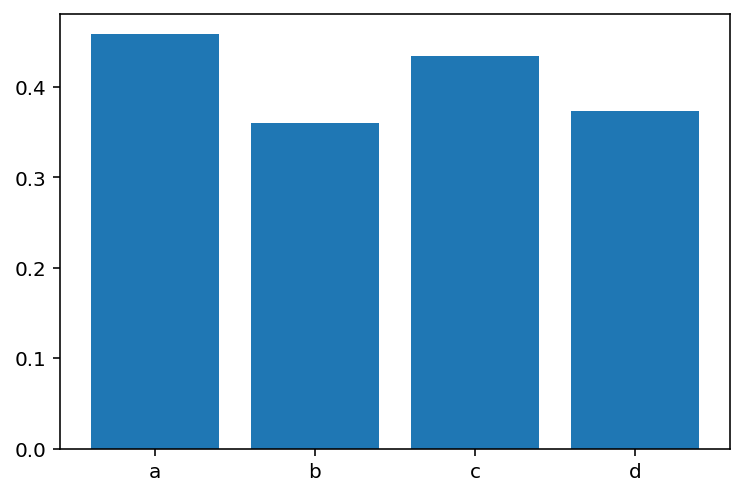

In [39]:
# 5-3) AgeGrp 별 생존율을 집계하여 tmp 데이터프레임을 선언하세요.

tmp = titanic.groupby(by ='AgeGrp',as_index = False)['Survived'].mean()
tmp
# 5-4) tmp 데이터프레임을 막대그래프로 시각화해 확인하세요.
plt.bar(tmp['AgeGrp'], tmp['Survived'])
plt.show()

In [78]:
#5-1
q1 = titanic.describe().loc['25%','Age']
q2 = titanic.describe().loc['50%','Age']
q3 = titanic.describe().loc['75%','Age']
print(q1,q2,q3)
#5-2 
my_label = list('abcd')
my_bin = [-np.inf, q1, q2, q3, np.inf]
titanic['AgeGrp'] = pd.cut(titanic['Age'] ,bins = my_bin, labels = my_label)


#5-3  AgeGrp 별 생존율을 집계하여 tmp 데이터프레임을 선언하세요.
tmp = titanic.groupby(by = 'AgeGrp', as_index = False)[['Survived']].mean()
tmp.head()

20.125 28.0 38.0


,AgeGrp,Survived
0,a,0.458101
1,b,0.360656
2,c,0.434286
3,d,0.372881


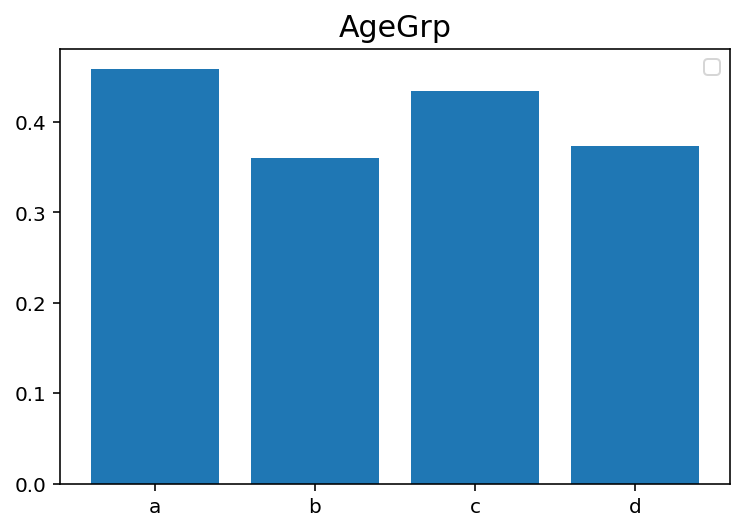

In [77]:
#시각화
plt.title('AgeGrp', size = 15)
plt.legend( [ 'AgeGrp','Survived'])

plt.bar(x = tmp['AgeGrp'], height = tmp['Survived'])
plt.show()